#Universidad EAN
##**Machine Learning 1**
##**Guía 3  Actividad 2**

Presentado por
##**María Camila Tarazona Nieto**
##**Leyla Rocío Becerra Barajas**

---
# **Librerías**
---
Instalación de paquetes, importar las librerías necesarias y cargar la base de datos

In [2]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

---
# **Versiones**
---
Este documento fue realizado con las siguientes versiones:

- Python 3.10.12
- NumPy 1.25.2
- Pandas 1.5.3
- Matplotlib 3.8

In [3]:
#Versiones actuales
!python --version
print('NumPy', np.__version__)
print('Pandas', pd.__version__)

Python 3.10.12
NumPy 1.25.2
Pandas 2.0.3


---
# **Instalaciones**
---
Se instala el paquete de [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/), con el fin de tener acceso directo a la base de de datos "[Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality)", la cual forma parte del informe "[Modeling wine preferences by data mining from physicochemical properties](https://www.semanticscholar.org/paper/Modeling-wine-preferences-by-data-mining-from-Cortez-Cerdeira/bf15a0ccc14ac1deb5cea570c870389c16be019c)"



In [4]:
pip install ucimlrepo

---
# **Base de datos**
---
La base de datos está constituida por dos conjuntos de datos que relacionan las muestras de vino tinto y blanco de Vinho Verde en Portugal.  Es objetivo es modelar la calidad del vino basándose en pruebas fisicoquímicas.


### **Carga de Base de datos**

In [5]:
from ucimlrepo import fetch_ucirepo, list_available_datasets

# check which datasets can be imported
list_available_datasets()

-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Annealing                                                                               3     
Audiology (Standardized)                                                                8     
Auto MPG                                                                                9     
Automobile                                                                              10    
Balance Scale                                                                           12    
Balloons                       

In [6]:
# Selección de la base de datos y carga de sus datos en una variable
winequality = fetch_ucirepo(id=186)
winequality

{'data': {'ids': None,
  'features':       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
  0               7.4              0.70         0.00             1.9      0.076   
  1               7.8              0.88         0.00             2.6      0.098   
  2               7.8              0.76         0.04             2.3      0.092   
  3              11.2              0.28         0.56             1.9      0.075   
  4               7.4              0.70         0.00             1.9      0.076   
  ...             ...               ...          ...             ...        ...   
  6492            6.2              0.21         0.29             1.6      0.039   
  6493            6.6              0.32         0.36             8.0      0.047   
  6494            6.5              0.24         0.19             1.2      0.041   
  6495            5.5              0.29         0.30             1.1      0.022   
  6496            6.0              0.21         0.38

In [7]:
# Exploración inicial de los datos - metadatos de la información
winequality.metadata

{'uci_id': 186,
 'name': 'Wine Quality',
 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality',
 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv',
 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).',
 'area': 'Business',
 'tasks': ['Classification', 'Regression'],
 'characteristics': ['Multivariate'],
 'num_instances': 4898,
 'num_features': 11,
 'feature_types': ['Real'],
 'demographics': [],
 'target_col': ['quality'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 2009,
 'last_updated': 'Wed Nov 15 2023',
 'dataset_doi': '10.24432/C56S3T',
 'creators': ['Paulo Cortez',
  'A. Cerdeira',
  'F. Almeida',
  'T. Matos',
  'J. Reis'],
 'intro_paper': {'title': 'Modeling wine preferences 

In [8]:
winequality.data

{'ids': None,
 'features':       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
 0               7.4              0.70         0.00             1.9      0.076   
 1               7.8              0.88         0.00             2.6      0.098   
 2               7.8              0.76         0.04             2.3      0.092   
 3              11.2              0.28         0.56             1.9      0.075   
 4               7.4              0.70         0.00             1.9      0.076   
 ...             ...               ...          ...             ...        ...   
 6492            6.2              0.21         0.29             1.6      0.039   
 6493            6.6              0.32         0.36             8.0      0.047   
 6494            6.5              0.24         0.19             1.2      0.041   
 6495            5.5              0.29         0.30             1.1      0.022   
 6496            6.0              0.21         0.38             0.8     

## **Exploración de la Base de datos**

Se exploran los datos de la base de datos para familiarizarse con la información, tipos de datos y cantidad de registros

In [9]:
# Exploración inicial de los datos - variables disponibles
winequality.variables

,name,role,type,demographic,description,units,missing_values
0,fixed_acidity,Feature,Continuous,None,None,None,no
1,volatile_acidity,Feature,Continuous,None,None,None,no
2,citric_acid,Feature,Continuous,None,None,None,no
3,residual_sugar,Feature,Continuous,None,None,None,no
4,chlorides,Feature,Continuous,None,None,None,no
5,free_sulfur_dioxide,Feature,Continuous,None,None,None,no
6,total_sulfur_dioxide,Feature,Continuous,None,None,None,no
7,density,Feature,Continuous,None,None,None,no
8,pH,Feature,Continuous,None,None,None,no
9,sulphates,Feature,Continuous,None,None,None,no


In [10]:
# Exploración inicial de los datos - características
winequality.data.features

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [11]:
winequality.data.targets

,quality
0,5
1,5
2,5
3,6
4,5
...,...
6492,6
6493,5
6494,6
6495,7


---
# **Análisis exploratorio de los datos**
---

## **Uso de un dataframe (pandas)**

Se crea una estructura de datos "dataframe" de la librería [pandas](https://https://pandas.pydata.org/) la cual facilita el análisis de los datos, puesto que  ya cuenta con funciones implementadas para ello.

In [12]:
df=pd.DataFrame(winequality.data.features, columns=winequality.variables.name)


In [13]:
df.loc[:,'quality']=winequality.data.targets

In [14]:
df

name,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0,NaN
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0,NaN
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0,NaN
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0,NaN
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6.0,NaN
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5.0,NaN
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6.0,NaN
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7.0,NaN


##**Identificación de variables**

Se explora el archivo revisando el nombre, el tipo de información y cantidad de registros con valores nulos para cada variable.

In [15]:
# Exploración inicial del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   float64
 12  color                 0 non-null      float64
dtypes: float64(13)
memory usage: 660.0 KB


## **Eliminación de columnas sin datos**

In [16]:
df=df.drop(columns=['color'])
df

name,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6.0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5.0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6.0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7.0


##**Estadísticas principales**

Se explora el archivo revisando el nombre, el tipo de información y cantidad de registros con valores nulos para cada variable.

Se hace evidente que todas las variables son numéricas y por tanto se pueden calcular directamente las principales estadísticas

In [17]:
# Exploración inicial de los datos - valores estadísticos totales calculados a las variables numéricas
df.describe()

name,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### **Histogramas**

array([[<Axes: title={'center': 'fixed_acidity'}>,
        <Axes: title={'center': 'volatile_acidity'}>],
       [<Axes: title={'center': 'citric_acid'}>,
        <Axes: title={'center': 'residual_sugar'}>],
       [<Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free_sulfur_dioxide'}>],
       [<Axes: title={'center': 'total_sulfur_dioxide'}>,
        <Axes: title={'center': 'density'}>],
       [<Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'sulphates'}>],
       [<Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

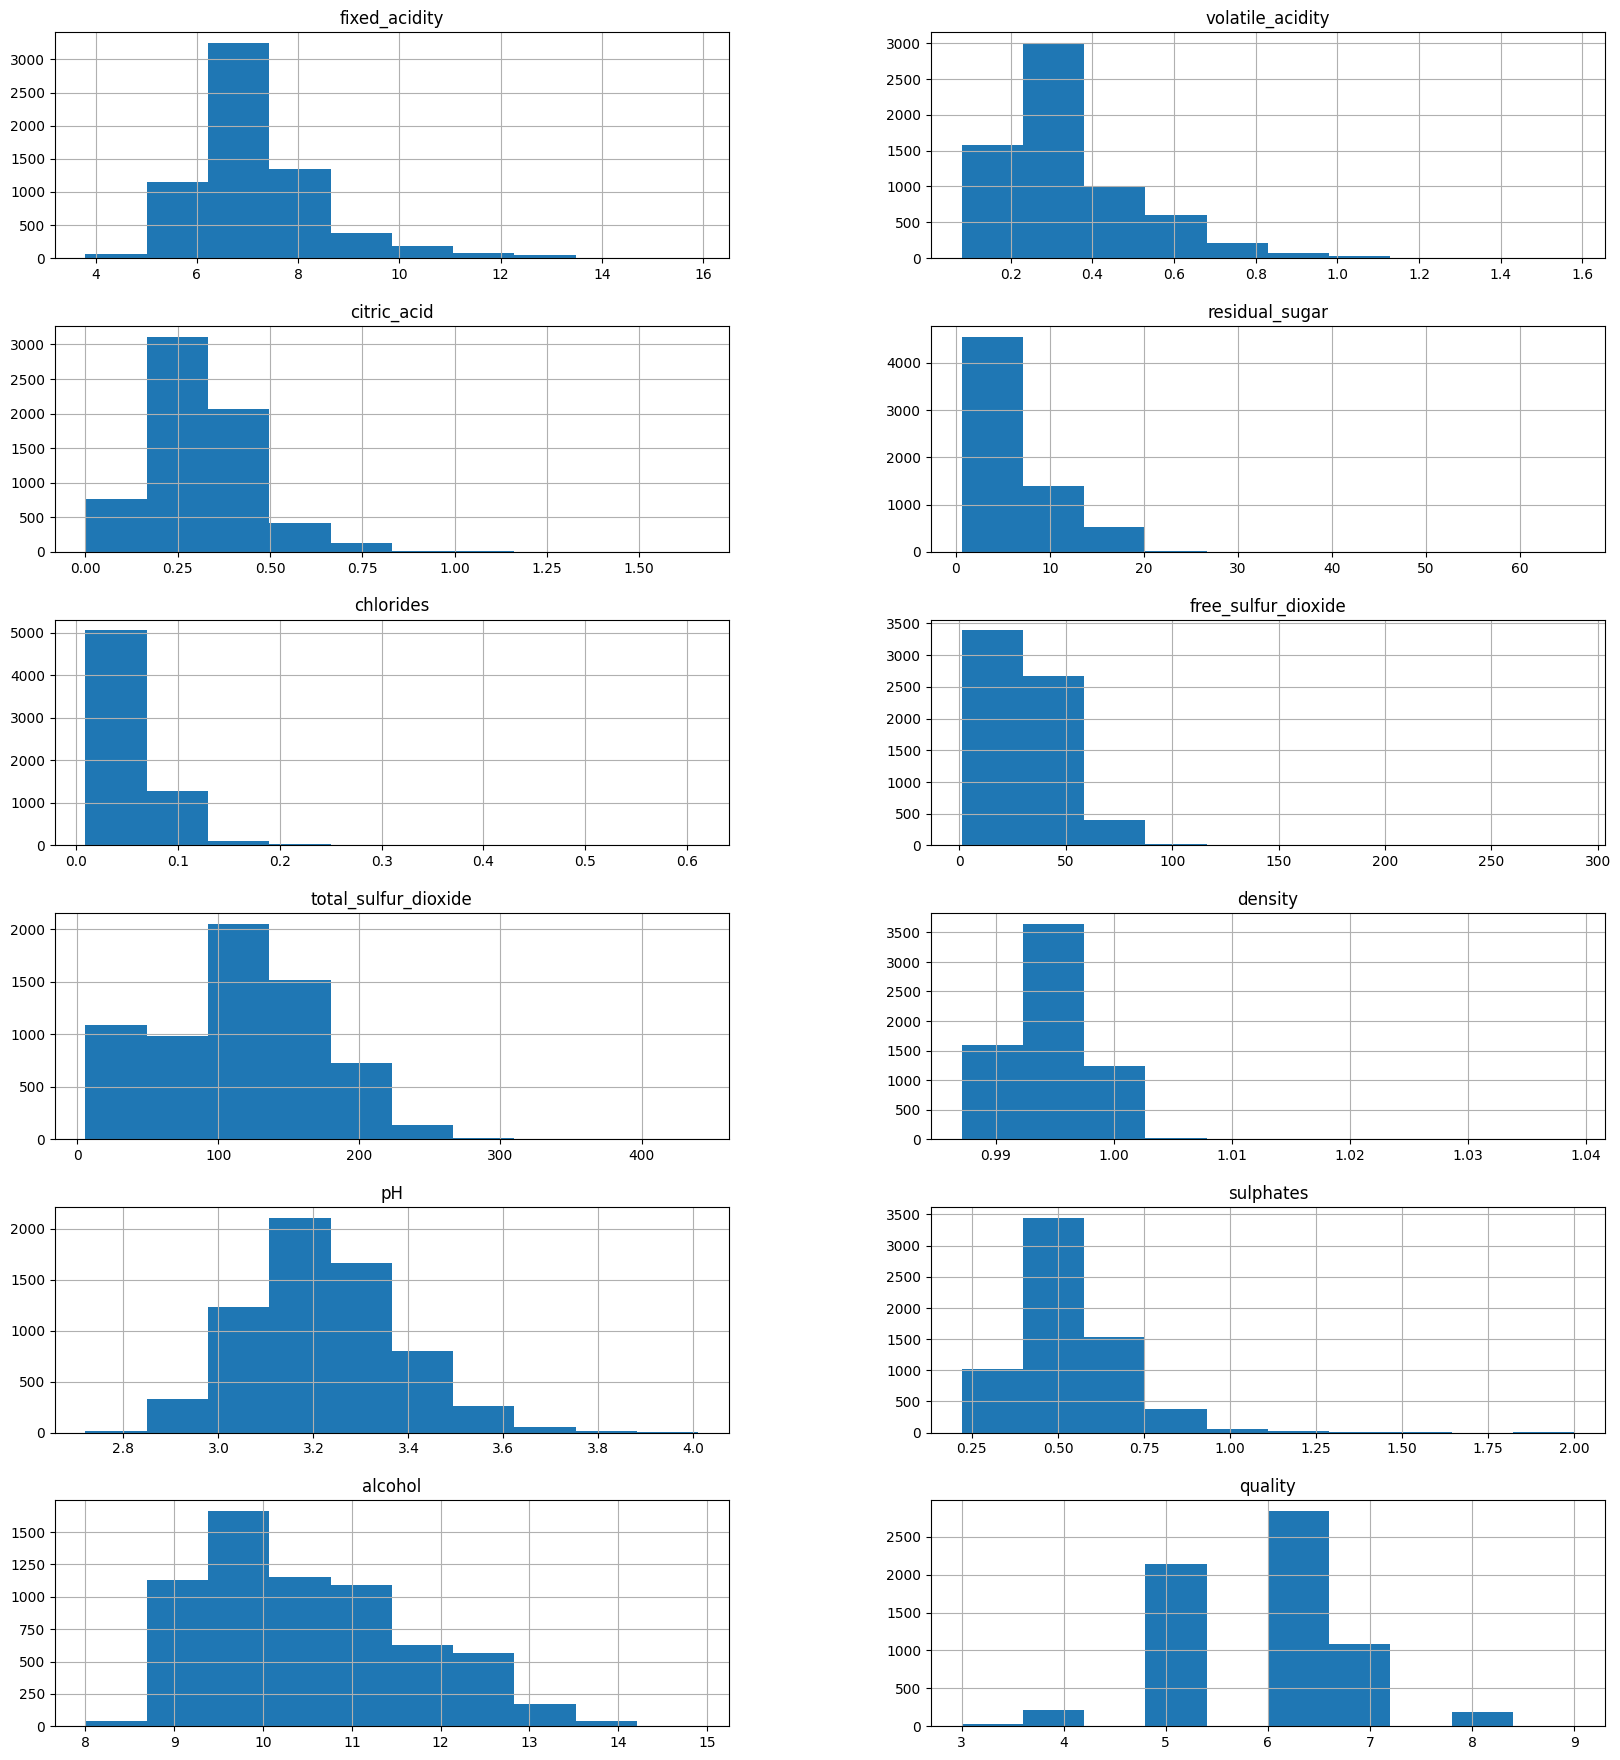

In [18]:
fig, axis = plt.subplots(6,2, figsize=(20,22))
df.hist(ax=axis)

<ipython-input-19-a1d703a3bc68>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df.columns[i]])
<ipython-input-19-a1d703a3bc68>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df.columns[i]])
<ipython-input-19-a1d703a3bc68>:5: UserWarning: 

`distplot` is a deprecated function and will b

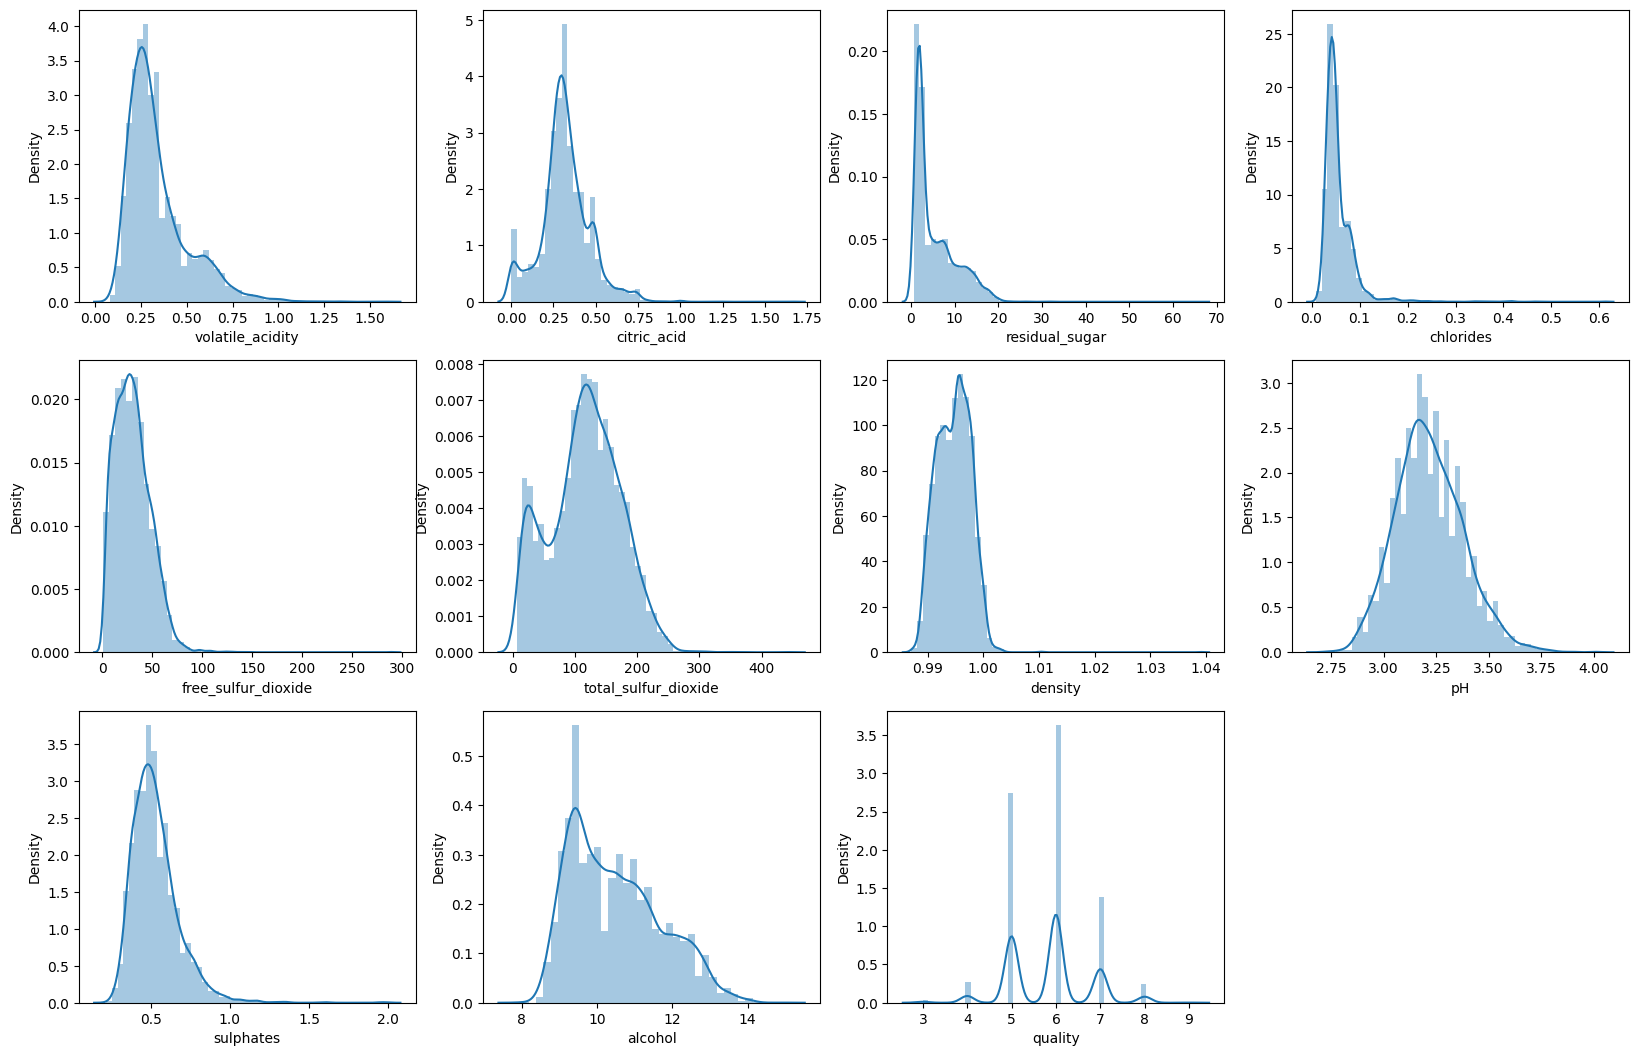

In [19]:
plt.figure(figsize = (20,22))

for i in range(1,12):
    plt.subplot(5,4,i)
    sns.distplot(df[df.columns[i]])

### **Cuantiles**

<Axes: >

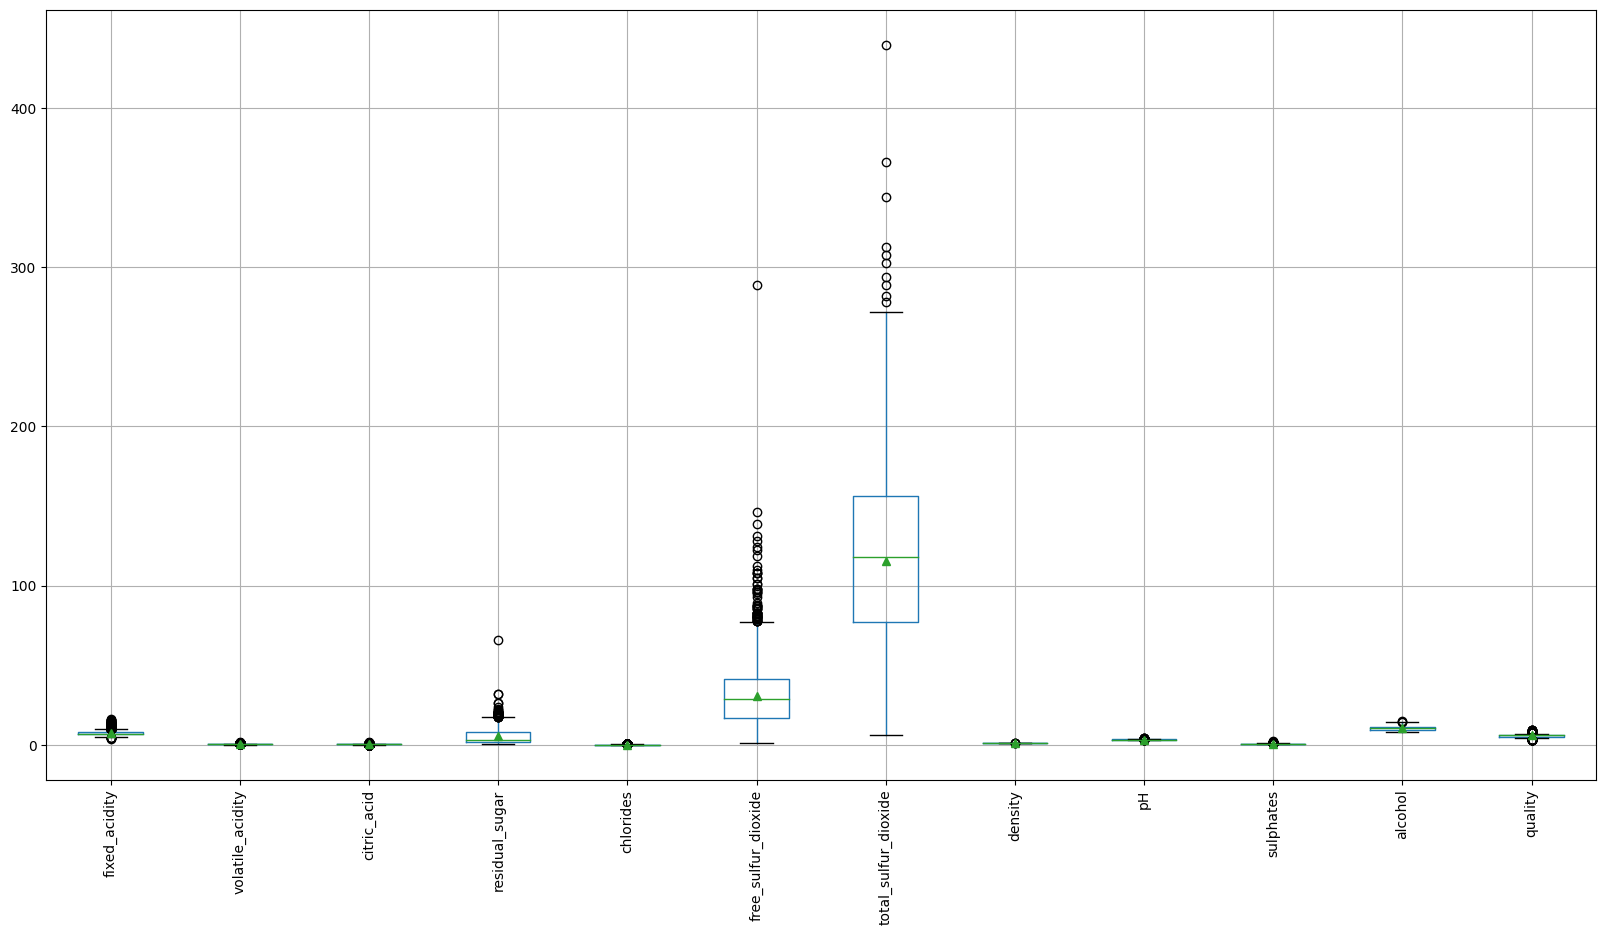

In [20]:
df.boxplot(showmeans=True, rot=90,figsize=(20,10) )

# **Coeficiente de Correlación**

Para determinar qué variables están altamente correlacionadas con el nivel de creatividad para los negocios se utiliza el coeficiente de correlación Pearson, el cual se puede identificar el nivel de relación en sentido lineal de las variables con respecto al índice CREAX.

In [21]:
corr_matriz=df.corr()
corr_matriz.style.background_gradient()

name,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
name,,,,,,,,,,,,
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506


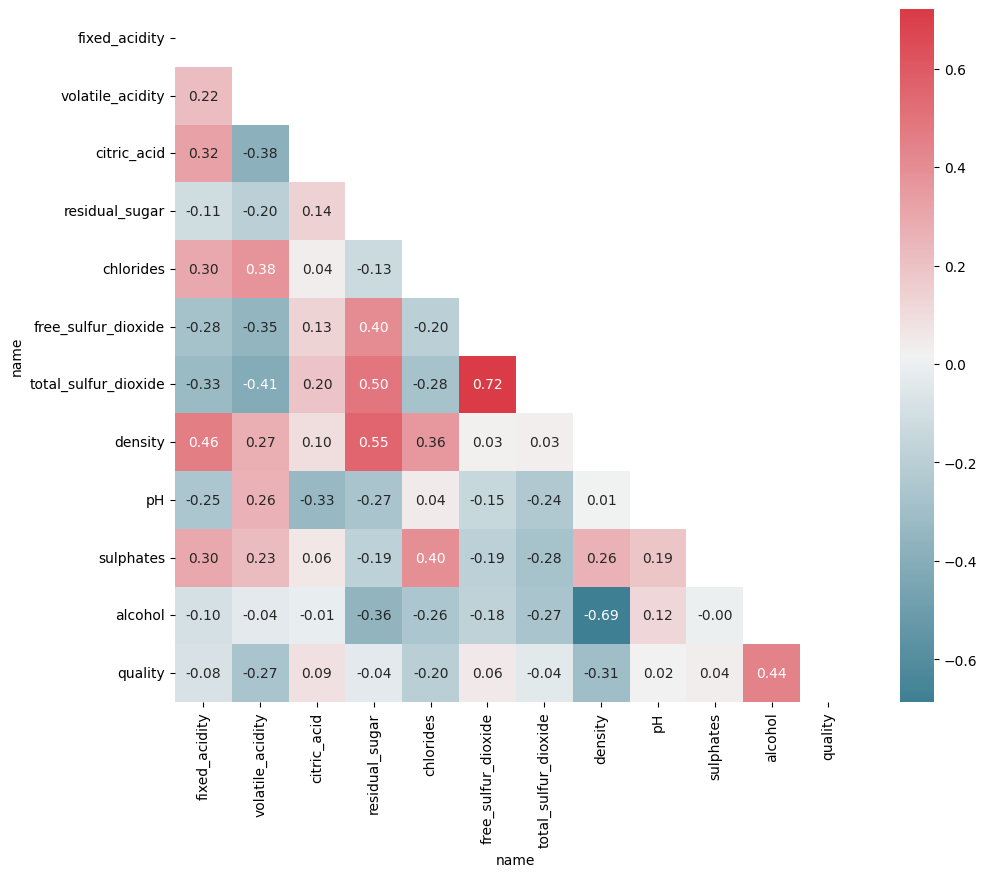

In [22]:
plt.figure(figsize=(11,9))
dropSelf = np.zeros_like(corr_matriz)
dropSelf[np.triu_indices_from(dropSelf)] = True

sns.heatmap(corr_matriz, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=dropSelf)

sns.set(font_scale=1.5)

In [23]:
correlacion=df.corr()['quality'].sort_values(ascending=False)
correlacion=correlacion[1:]

<Axes: title={'center': 'Indice de correlación con Calidad'}, xlabel='name'>

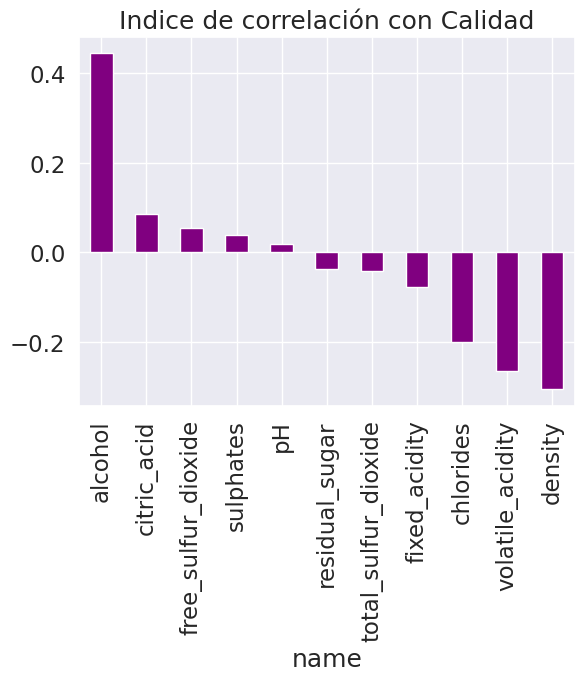

In [24]:
correlacion.plot.bar(title='Indice de correlación con Calidad', color='purple')

# **Diagramas de dispersión**

Mediante los diagramas de dispersión, es posible identificar patrones de linealidad entre las variables.  Por eso se elaboran los diagramas para cada variable.

Text(0.5, 1.0, 'quality')

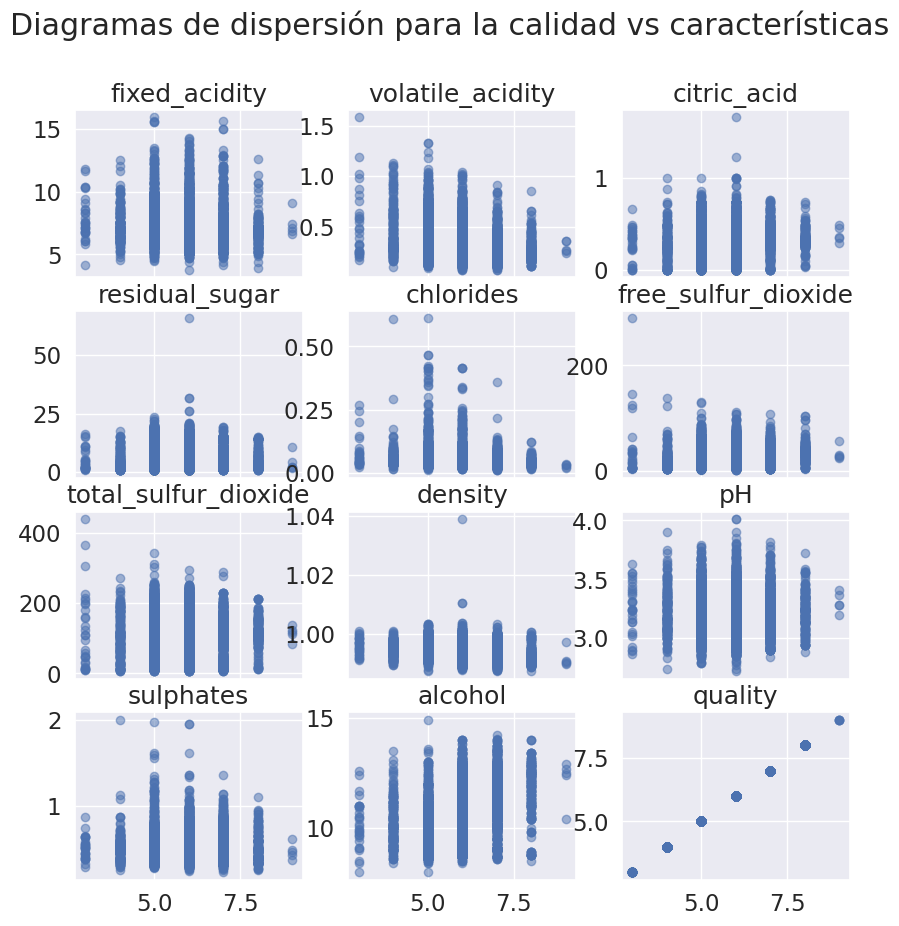

In [25]:
fig, ax = plt.subplots(4, 3,sharex=True,  figsize=(10,10))
fig.suptitle('Diagramas de dispersión para la calidad vs características')
ax[0,0].scatter(x=df.quality,y= df.fixed_acidity, alpha= 0.5)
ax[0,1].scatter(x=df.quality,y= df.volatile_acidity, alpha= 0.5)
ax[0,2].scatter(x=df.quality,y= df.citric_acid, alpha= 0.5)
ax[1,0].scatter(x=df.quality,y= df.residual_sugar, alpha= 0.5)
ax[1,1].scatter(x=df.quality,y= df.chlorides, alpha= 0.5)
ax[1,2].scatter(x=df.quality,y= df.free_sulfur_dioxide, alpha= 0.5)
ax[2,0].scatter(x=df.quality,y= df.total_sulfur_dioxide, alpha= 0.5)
ax[2,1].scatter(x=df.quality,y= df.density, alpha= 0.5)
ax[2,2].scatter(x=df.quality,y= df.pH, alpha= 0.5)
ax[3,0].scatter(x=df.quality,y= df.sulphates, alpha= 0.5)
ax[3,1].scatter(x=df.quality,y= df.alcohol, alpha= 0.5)
ax[3,2].scatter(x=df.quality,y= df.quality, alpha= 0.5)

ax[0,0].set_title('fixed_acidity')
ax[0,1].set_title('volatile_acidity')
ax[0,2].set_title('citric_acid')
ax[1,0].set_title('residual_sugar')
ax[1,1].set_title('chlorides')
ax[1,2].set_title('free_sulfur_dioxide')
ax[2,0].set_title('total_sulfur_dioxide')
ax[2,1].set_title('density')
ax[2,2].set_title('pH')
ax[3,0].set_title('sulphates')
ax[3,1].set_title('alcohol')
ax[3,2].set_title('quality')

---
# **Preparación de los datos**
---

Se preparan los datos para ser usados en los modelos

In [26]:
variables=['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density','pH', 'sulphates', 'alcohol']
variables

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [27]:
# Dividir los datos en variables independientes (X) y variable dependiente (y)
X = df[variables]
y = df['quality']

In [28]:
X

name,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [29]:
y

0       5.0
1       5.0
2       5.0
3       6.0
4       5.0
       ... 
6492    6.0
6493    5.0
6494    6.0
6495    7.0
6496    6.0
Name: quality, Length: 6497, dtype: float64

In [30]:
#Convertir los datos de calidad a una variable binaria
ybin=pd.cut(x=y, bins=[0,5,10], labels=[0,1])
ybin

0       0
1       0
2       0
3       1
4       0
       ..
6492    1
6493    0
6494    1
6495    1
6496    1
Name: quality, Length: 6497, dtype: category
Categories (2, int64): [0 < 1]

## **Escalamiento de variables**
Como se ve en la figura de cuantiles, las variables tienen escalas muy distintas que podrían influir en el desempeño de los modelos.  Por tanto se realiza un escalado de las mismas.

In [58]:
scaler= MinMaxScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)

{'whiskers': [<matplotlib.lines.Line2D at 0x79d175c11240>,
 'caps': [<matplotlib.lines.Line2D at 0x79d175c13700>,
 'boxes': [<matplotlib.lines.Line2D at 0x79d175c10520>,
 'medians': [<matplotlib.lines.Line2D at 0x79d175c10f10>,
 'fliers': [<matplotlib.lines.Line2D at 0x79d175c13910>,
 'means': [<matplotlib.lines.Line2D at 0x79d175c12560>,
  <matplotlib.lines.Line2D at 0x79d17471ac50>]}

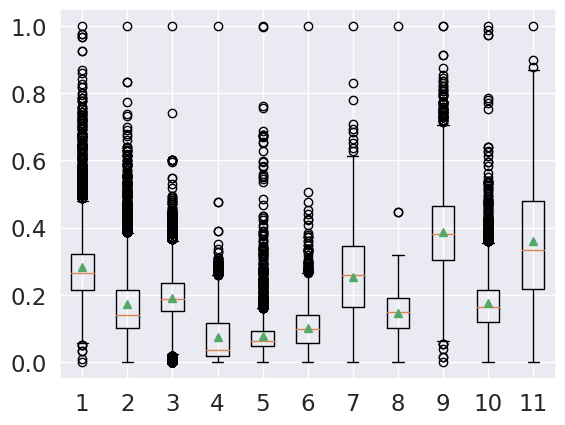

In [59]:
plt.boxplot(X_scaled,showmeans=True)

---
# **Modelo de Regresión lineal**
---

Se debe establecer y resolver el modelo de regresión lineal que determine la ecuación representativa de la situación

In [60]:
# Dividir los datos en conjuntos de entrenamiento y prueba (por ejemplo, 70% para entrenamiento, 20% para prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train

name,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
2137,6.1,0.24,0.30,1.5,0.045,22.0,61.0,0.99200,3.31,0.54,10.4
2652,9.4,0.29,0.55,2.2,0.050,17.0,119.0,0.99620,3.12,0.69,10.3
1544,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.2
3447,8.7,0.49,0.57,17.8,0.052,34.0,243.0,1.00070,2.98,0.82,9.0
1067,11.1,0.31,0.53,2.2,0.060,3.0,10.0,0.99572,3.02,0.83,10.9
...,...,...,...,...,...,...,...,...,...,...,...
4931,6.5,0.22,0.28,3.7,0.059,29.0,151.0,0.99177,3.23,0.41,12.1
3264,6.5,0.13,0.37,1.0,0.036,48.0,114.0,0.99110,3.41,0.51,11.5
1653,6.8,0.20,0.59,0.9,0.147,38.0,132.0,0.99300,3.05,0.38,9.1
2607,6.6,0.22,0.37,1.2,0.059,45.0,199.0,0.99300,3.37,0.55,10.3


In [61]:
# Crear el modelo de regresión lineal
modeloLin = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
modeloLin.fit(X_train, y_train)
score_train=modeloLin.score(X_train, y_train)
intercepto=modeloLin.intercept_
coeficientes=modeloLin.coef_
caracteristicas=modeloLin.feature_names_in_
# Coeficientes de la regresión
print("Intercepto:", intercepto)
print("Coeficientes:", coeficientes)


Intercepto: 58.308962019224374
Coeficientes: [ 7.03590518e-02 -1.27686945e+00 -7.49878498e-02  4.53441455e-02
 -8.16478795e-01  5.38561653e-03 -2.48514612e-03 -5.75708767e+01
  4.62707785e-01  7.57099574e-01  2.62908891e-01]


---
## **Ecuación representativa**
---

Es decir que la ecuación representativa se podría escribir como:

$y = {\beta}_{0} +{\beta}_{1} x_1  + {\beta}_{2} x_2 + {\beta}_{3} x_3  + {\beta}_{4} x_4 + {\beta}_{5} x_5 +  {\beta}_{6} x_6 +  {\beta}_{7} x_7 + +  {\beta}_{8} x_8 +  {\beta}_{9} x_9 +  {\beta}_{10} x_{10} +  {\beta}_{11} x_{11}$

En donde:
*   $y$ corresponde a la variable quality
*   $x_1$ corresponde a la variable fixed_acidity
*   $x_2$ corresponde a la variable volatile_acidity
*   $x_3$ corresponde a la variable citric_acid
*   $x_4$ corresponde a la variable residual_sugar
*   $x_5$ corresponde a la variable chlorides
*   $x_6$ corresponde a la variable free_sulfur_dioxide
*   $x_7$ corresponde a la variable total_sulfur_dioxide
*   $x_8$ corresponde a la variable density
*   $x_9$ corresponde a la variable pH
*   $x_{10}$ corresponde a la variable sulphates
*   $x_{11}$ corresponde a la variable alcohol

Y

*   ${\beta}_{0}$ corresponde al valor que conocemos como el intercepto
*   ${\beta}_{1}$ corresponde al coeficiente de la variable fixed_acidity
*   ${\beta}_{2}$ corresponde al coeficiente de la variable volatile_acidity
*   ${\beta}_{3}$ corresponde al coeficiente de la variable citric_acid
*   ${\beta}_{4}$ corresponde al coeficiente de la variable residual_sugar
*   ${\beta}_{5}$ corresponde al coeficiente de la variable chlorides
*   ${\beta}_{6}$ corresponde al coeficiente de la variable free_sulfur_dioxide
*   ${\beta}_{7}$ corresponde al coeficiente de la variable total_sulfur_dioxide
*   ${\beta}_{8}$ corresponde al coeficiente de la variable density
*   ${\beta}_{9}$ corresponde al coeficiente de la variable pH
*   ${\beta}_{10}$ corresponde al coeficiente de la variable sulphates
*   ${\beta}_{11}$ corresponde al coeficiente de la variable alcohol

Es decir, usando los resultados obtenidos del modelo de regresión lineal, se obtiene la siguiente ecuación que representa la relación de las variables del estudio con la calidad del vino:

In [62]:
print('y = %2f + %2fx1 + %2fx2 + %2fx3 + %2fx4 + %2fx5 + %2fx6 + %2fx7 + %2fx8 + %2fx9 + %2fx10 + %2fx11'%(intercepto,coeficientes[0],coeficientes[1],coeficientes[2],coeficientes[3],coeficientes[4],coeficientes[5],coeficientes[6],coeficientes[7],coeficientes[8],coeficientes[9],coeficientes[10]))

y = 58.308962 + 0.070359x1 + -1.276869x2 + -0.074988x3 + 0.045344x4 + -0.816479x5 + 0.005386x6 + -0.002485x7 + -57.570877x8 + 0.462708x9 + 0.757100x10 + 0.262909x11


---
## **Validación del modelo**
---

In [63]:
# Realizar predicciones sobre los datos de prueba
y_pred = modeloLin.predict(X_test)

In [64]:
score_test=modeloLin.score(X_test, y_test)
print("Score datos de entrenamiento:", score_train)
print("Score datos de prueba       :", score_test)

Score datos de entrenamiento: 0.293757973078256
Score datos de prueba       : 0.2874326217380755


## **Importancia de las variables**

¿Cuáles son las variables (rasgos de personalidad y/o edad) significativas que explican la creatividad para los negocios?

De acuerdo con la ecuación y los índices ${\beta}_i$ encontrados, las variables más significativas que explican la creatividad para los negocios son: Complejidad, Audacia y abstracción.


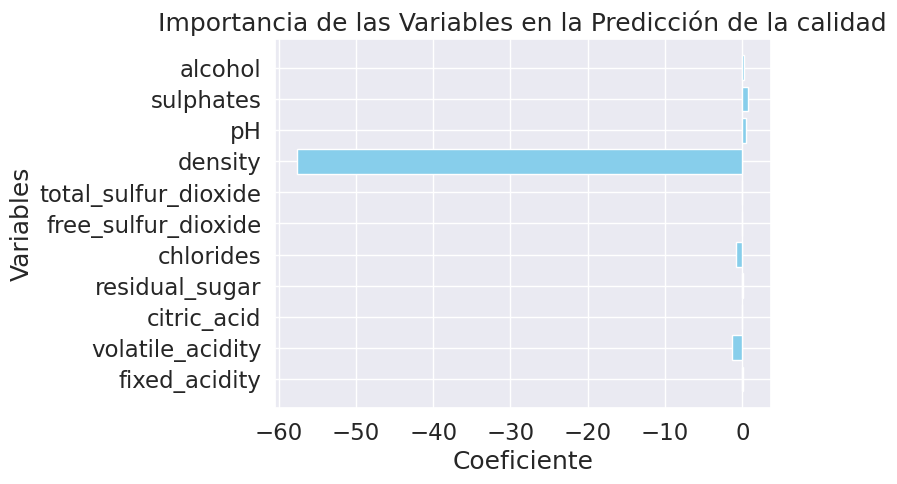

In [65]:
# Crear una figura y ejes
fig, ax = plt.subplots()

# Barplot de los coeficientes
ax.barh(variables, coeficientes, color='skyblue')

# Etiquetas y título
ax.set_xlabel('Coeficiente')
ax.set_ylabel('Variables')
ax.set_title('Importancia de las Variables en la Predicción de la calidad')

# Mostrar la gráfica
plt.show()

##**Diagnóstico del modelo**

Para diagnosticar el comportamiento del modelo se puede tener analizar la diferencia entre los valores observados y los valores que predijo el modelo.  

Por ello se puede empezar el análisis mediante un diagrama en el que se puedan ver claramente las diferencias entre los dos:

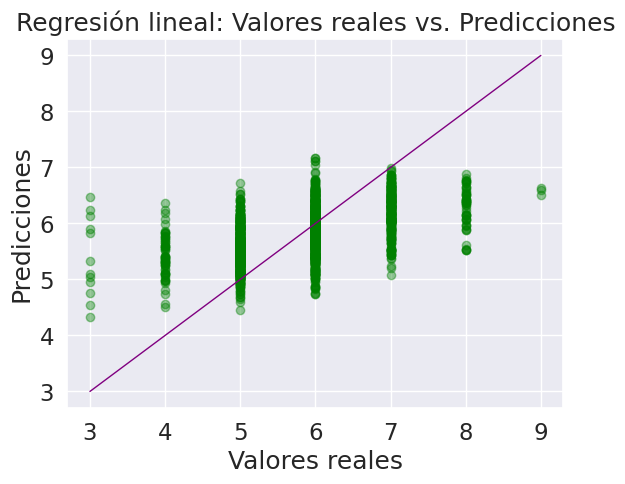

In [66]:
# Graficar los puntos de datos reales
plt.scatter(y_test, y_pred,alpha=0.4, color='green')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Regresión lineal: Valores reales vs. Predicciones')
plt.grid(True)

# Agregar la línea de regresión
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='purple', linestyle='-', linewidth=1)
plt.show()

---
# **Modelo de Regresión Logística**
---

Se debe establecer y resolver el modelo de regresión logística que determine la ecuación representativa de la situación

In [67]:
# Dividir los datos en conjuntos de entrenamiento y prueba (por ejemplo, 70% para entrenamiento, 30% para prueba)
X_train, X_test, y_train, y_test = train_test_split(X, ybin, test_size=0.3, random_state=0)

# Crear el modelo de regresión lineal
modeloLog = LogisticRegression()

# Entrenar el modelo con los datos de entrenamiento
modeloLog.fit(X_train, y_train)
score_train=modeloLog.score(X_train, y_train)
int_log=modeloLog.intercept_[0]
coe_log=modeloLog.coef_[0]
caracteristicas=modeloLog.feature_names_in_
# Coeficientes de la regresión
print("Intercepto:", int_log)
print("Coeficientes:", coe_log)

Intercepto: -1.5888644718119322
Coeficientes: [-0.08952428 -4.68814253 -0.44619122  0.06903968 -0.69526037  0.01590326
 -0.01036625 -1.48537143 -1.21897477  1.88085631  0.90785061]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


---
## **Ecuación representativa**
---

Es decir que la ecuación representativa se podría escribir como:

$y = {\beta}_{0} +{\beta}_{1} x_1  + {\beta}_{2} x_2 + {\beta}_{3} x_3  + {\beta}_{4} x_4 + {\beta}_{5} x_5 +  {\beta}_{6} x_6 +  {\beta}_{7} x_7 + +  {\beta}_{8} x_8 +  {\beta}_{9} x_9 +  {\beta}_{10} x_{10} +  {\beta}_{11} x_{11}$

En donde:
*   $y$ corresponde a la variable quality
*   $x_1$ corresponde a la variable fixed_acidity
*   $x_2$ corresponde a la variable volatile_acidity
*   $x_3$ corresponde a la variable citric_acid
*   $x_4$ corresponde a la variable residual_sugar
*   $x_5$ corresponde a la variable chlorides
*   $x_6$ corresponde a la variable free_sulfur_dioxide
*   $x_7$ corresponde a la variable total_sulfur_dioxide
*   $x_8$ corresponde a la variable density
*   $x_9$ corresponde a la variable pH
*   $x_{10}$ corresponde a la variable sulphates
*   $x_{11}$ corresponde a la variable alcohol

Y

*   ${\beta}_{0}$ corresponde al valor que conocemos como el intercepto
*   ${\beta}_{1}$ corresponde al coeficiente de la variable fixed_acidity
*   ${\beta}_{2}$ corresponde al coeficiente de la variable volatile_acidity
*   ${\beta}_{3}$ corresponde al coeficiente de la variable citric_acid
*   ${\beta}_{4}$ corresponde al coeficiente de la variable residual_sugar
*   ${\beta}_{5}$ corresponde al coeficiente de la variable chlorides
*   ${\beta}_{6}$ corresponde al coeficiente de la variable free_sulfur_dioxide
*   ${\beta}_{7}$ corresponde al coeficiente de la variable total_sulfur_dioxide
*   ${\beta}_{8}$ corresponde al coeficiente de la variable density
*   ${\beta}_{9}$ corresponde al coeficiente de la variable pH
*   ${\beta}_{10}$ corresponde al coeficiente de la variable sulphates
*   ${\beta}_{11}$ corresponde al coeficiente de la variable alcohol

Es decir, usando los resultados obtenidos del modelo de regresión logístico, se obtiene la siguiente ecuación que representa la relación de las variables del estudio con la calidad del vino:

In [68]:
print('y = %2f + %2fx1 + %2fx2 + %2fx3 + %2fx4 + %2fx5 + %2fx6 + %2fx7 + %2fx8 + %2fx9 + %2fx10 + %2fx11'%(int_log,coe_log[0],coe_log[1],coe_log[2],coe_log[3],coe_log[4],coe_log[5],coe_log[6],coe_log[7],coe_log[8],coe_log[9],coe_log[10]))

y = -1.588864 + -0.089524x1 + -4.688143x2 + -0.446191x3 + 0.069040x4 + -0.695260x5 + 0.015903x6 + -0.010366x7 + -1.485371x8 + -1.218975x9 + 1.880856x10 + 0.907851x11


---
## **Validación del modelo**
---

In [69]:
# Realizar predicciones sobre los datos de prueba
y_pred = modeloLog.predict(X_test)


In [70]:
score_test=modeloLog.score(X_test, y_test)
print("Score datos de entrenamiento:", score_train)
print("Score datos de prueba       :", score_test)

Score datos de entrenamiento: 0.7426874862546734
Score datos de prueba       : 0.7292307692307692


## **Importancia de las variables**

¿Cuáles son las variables (rasgos de personalidad y/o edad) significativas que explican la creatividad para los negocios?

De acuerdo con la ecuación y los índices ${\beta}_i$ encontrados, las variables más significativas que explican la creatividad para los negocios son: Complejidad, Audacia y abstracción.


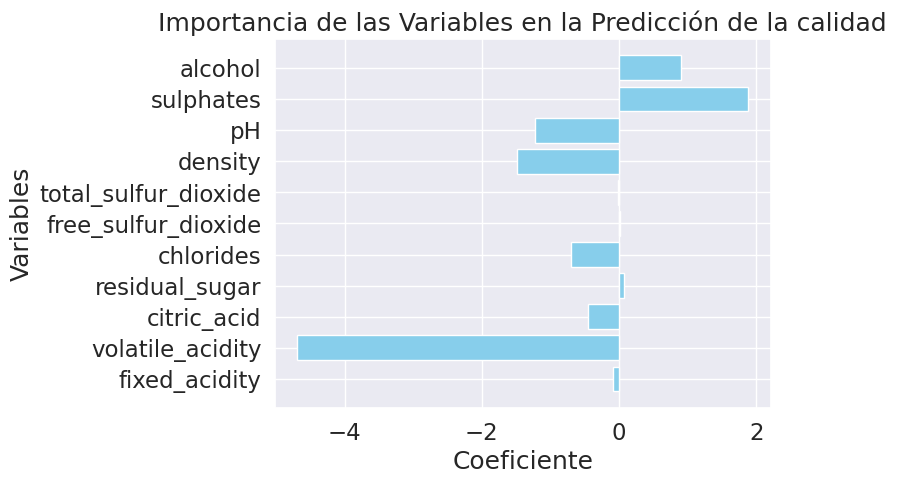

In [71]:
# Crear una figura y ejes
fig, ax = plt.subplots()

# Barplot de los coeficientes
ax.barh(variables, coe_log, color='skyblue')

# Etiquetas y título
ax.set_xlabel('Coeficiente')
ax.set_ylabel('Variables')
ax.set_title('Importancia de las Variables en la Predicción de la calidad')

# Mostrar la gráfica
plt.show()

---
# **Informe general de los resultados**
---

A través de este estudio se realizaron algunos análisis que permitieron identificar:



El objetivo de este proyecto es predecir la calidad de las variedades rojas del vino portugués "Vinho Verde" utilizando características físico-químicas. El conjunto de datos utilizado para este proyecto se obtiene del Repositorio de Aprendizaje Automático de la UCI (UCI Machine Learning Repository). Este conjunto de datos contiene mediciones de varias propiedades físico-químicas de muestras de vino, así como la calidad de cada muestra según la evaluación sensorial de expertos.

La calidad del vino es una medida crucial para los productores y consumidores por igual. Para los productores, entender qué factores contribuyen a la calidad del vino puede ayudarles a mejorar sus procesos de producción. Para los consumidores, poder predecir la calidad del vino antes de comprarlo puede influir en su decisión de compra.

Además, el vino portugués Vinho Verde es conocido por su singularidad y tradición. Es un vino joven y fresco, con una acidez equilibrada y a menudo se describe como un vino ligero y fácil de beber. Comprender qué características físico-químicas contribuyen a la calidad del Vinho Verde puede proporcionar información valiosa para los productores y consumidores de este vino específico.

Para abordar este problema, utilizaremos técnicas de análisis de datos y aprendizaje automático para construir modelos predictivos que puedan predecir la calidad del vino en función de sus características físico-químicas.

---


# Que se obtuvo en cada modelo


**Modelo de Regresión Lineal**
Estos puntajes de regresión lineal indican que el modelo tiene un desempeño moderado. Un score de 0.29 en los datos de entrenamiento y 0.29 en los datos de prueba sugiere que el modelo está aprendiendo algo de la relación entre las variables, pero hay margen para mejorar.

Aquí hay algunas conclusiones que se pueden extraer:

1. Capacidad predictiva moderada: El modelo parece tener cierta capacidad para predecir los datos, ya que el puntaje en los datos de prueba no es significativamente más bajo que en los datos de entrenamiento. Sin embargo, ambos puntajes son relativamente bajos, lo que sugiere que el modelo no está capturando completamente la variabilidad en los datos.
2. Posible sobreajuste o subajuste: Si bien los puntajes de entrenamiento y prueba son cercanos, esto podría indicar que el modelo no está sobreajustado ni subajustado significativamente. Sin embargo, sería útil investigar más a fondo para determinar si hay algún problema de ajuste.
3. Mejoras posibles: Podría ser beneficioso explorar diferentes técnicas de modelado, como la incorporación de más características relevantes, la selección de características, la ingeniería de características o la consideración de modelos más complejos que puedan capturar mejor la relación entre las variables.

En resumen, aunque el modelo muestra algún nivel de capacidad predictiva, hay margen para mejorar su rendimiento. Es importante continuar iterando y refinando el modelo para lograr mejores resultados.

**Modelo de Refresión Logistica**

1. Capacidad predictiva moderada: El modelo de regresión logística parece tener cierta capacidad para clasificar correctamente las muestras de vino en función de sus características físico-químicas. Los puntajes obtenidos en los datos de entrenamiento y prueba son relativamente similares, lo que sugiere que el modelo no está sobreajustado ni subajustado significativamente.

2. Posibles mejoras: Aunque el modelo tiene un desempeño moderado, aún hay margen para mejorar. Se podrían explorar diferentes técnicas de regularización o ajustar los hiperparámetros del modelo para intentar mejorar su capacidad predictiva.
3. Interpretación de los puntajes: Un puntaje de aproximadamente 0.74 en los datos de entrenamiento y 0.73 en los datos de prueba indica que el modelo es capaz de clasificar correctamente alrededor del 73-74% de las muestras de vino como "buenas" o "regulares". Si bien este nivel de precisión puede ser útil, siempre hay espacio para mejorar, especialmente si se trata de un problema crítico como la calidad del vino.

En resumen, el modelo de regresión logística muestra cierta capacidad para clasificar las muestras de vino en función de su calidad, pero aún hay oportunidades para mejorar su rendimiento mediante ajustes adicionales y técnicas de optimización.

# ¿Cuál de los dos modelos fue mejor?

---

En el caso del modelo de regresión lineal, obtuvimos un puntaje de 0.287 en los datos de prueba. Esto indica que el modelo explica aproximadamente el 28.7% de la variabilidad en la calidad del vino utilizando las características físico-químicas proporcionadas.

Para el modelo de regresión logística, obtuvimos un puntaje de 0.729 en los datos de prueba. Esto significa que el modelo clasificó correctamente aproximadamente el 72.9% de las muestras de vino como "buenas" o "regulares" basándose en sus características físico-químicas.

Comparando estos puntajes, vemos que el modelo de regresión logística tuvo un desempeño considerablemente mejor que el modelo de regresión lineal en términos de su capacidad para predecir la calidad del vino. Por lo tanto, en este caso, el modelo de regresión logística fue mejor en términos de su capacidad predictiva.

# **Referencias**


[1] https://archive.ics.uci.edu/dataset/186/wine+quality

[2] https://www.kaggle.com/datasets/sh6147782/winequalityred.

[3] https://www.kaggle.com/code/ankitakumar/linear-regression-using-wine-quality-dataset

[4] https://www.kaggle.com/code/ecedolen/classification-logistic-regression-wine-quality

